In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 67.0 MB/s 
     |████████████████████████████████| 448 kB 56.4 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  30142      0 --:--:-- --:--:-- --:--:-- 29964


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  66.2M      0 --:--:-- --:--:-- --:--:-- 66.2M


In [5]:
import pandas as pd

In [6]:
total_data = pd.read_table('./naver_shopping.txt', names=['ratings','reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


중복 빼기

In [8]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)  # inplace =True 덮어쓰기
len(total_data)

199908

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

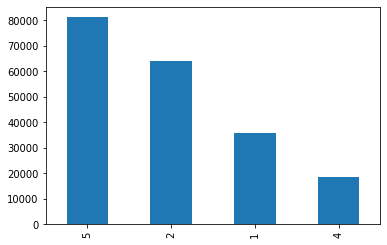

In [12]:
y_data.value_counts().plot(kind='bar')

3이 빠져있는 데이터 -> 그냥 진행하면 문제가 있기 때문에 임의로 채워넣어야함

# NLP

In [14]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ]',' ') # [^a-zA-Z]

175719                                           색상이 고르지 못함
53021     매우만족함 카리디티기 ㅊ피 맆기치치기치디치디리디치디치기리리릴리치리리피기치기리릴릴ㄹ어...
181505    주머니쪽과 안쪽을이렇게 얇고 약한 원단을 쓰면 어떻게합니까  바닥에 플라스틱 판이라...
79367                      좋아요 맨날 주스 눌러서 먹다가 이거 껴주니 잘먹어요 ㅎㅎ
118836                                     친절한배송에관한 전화가좋았네요
                                ...                        
49130                                    배송도 빠르고 사이주드 굿입니다 
68761                                  잘 붙여서 사용하겠습니다  감사합니다
72035                       너무 귀여워요 작은거 알고사서 크기는 신경안씀 예뿌다  
151444                                           방수에 쓰기 좋아요
139456               생각했던거보다 편하지않고 저한테는 넘 힘드네요  밤새 잠을 못잤네요 
Name: reviews, Length: 149931, dtype: object

In [16]:
from konlpy.tag import Mecab

In [17]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [18]:
x_train_small = x_train[0:5000]

In [19]:
sentence = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

print(sentence)

[['색상', '고르', '못함'], ['매우', '만족', '함', '카', '리디', '티', '기', 'ㅣ', 'ㅊ피', 'ㅣ', '맆기', '치치', '기', '치디', '치디', '리디', '치디', '치기', '리', '리릴리', '치리', '리피', '기치', '기리', '릴', '릴', 'ㄹ', '어', '어', '더', '처', '더', '어', '러', '더', '차', '더'], ['주머니', '쪽', '안쪽', '이렇게', '얇', '약한', '원단', '쓰', '면', '어떻', '합니까', '?', '바닥', '플라스틱', '판', '라도', '넣', '어야지', '거원', '싼', '거', '산', '제', '잘못', '죠', '뭐', 'ㅎㅎ'], ['좋', '아요', '맨날', '주스', '눌러서', '먹', '다가', '이거', '껴', '주', '니', '잘', '먹', '어요', 'ㅎㅎ'], ['친절', '배송', '관한', '전화', '좋', '았', '네요'], ['본드', '제거', '더', '힘드', '네요'], ['잘', '받', '앗', '어요', '뽑', '아', '쓰', '키친', '타올', '편하', '길래', '재', '구매', '햇', '어요', '배송', '빠르', '가격', '저렴', '네요', '정말', '만족', '합니다', '감사', '해요'], ['세탁', '해도', '옷감', '에서', '화학', '약품', '냄새', '나', '요', '.'], ['싼', '가격', '걍', '쓰', '기', '좋', '것', '같', '아요', '지퍼', '열기', '전', '비닐', '같', '바스럭', '소리', '나', '길래', '열', '어', '봤', '더니', '속', '천', '비닐천', '인가', '봐요'], ['재', '구매', '부드럽', '편하', '잘', '입', '겠', '어요'], ['임부', '용', '맞', '나요', '?', '배쪽', '밴드', '만', '없', '뿐', '사

## Tokenizer

In [20]:
import tensorflow as tf

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence)

In [22]:
tokenizer.word_index

{'.': 1,
 '네요': 2,
 '좋': 3,
 '어요': 4,
 '는데': 5,
 '아요': 6,
 '잘': 7,
 '있': 8,
 '구매': 9,
 '안': 10,
 '습니다': 11,
 '했': 12,
 '너무': 13,
 '배송': 14,
 '같': 15,
 '거': 16,
 '먹': 17,
 '어': 18,
 '되': 19,
 '재': 20,
 '~': 21,
 '!': 22,
 '쓰': 23,
 '합니다': 24,
 '요': 25,
 '기': 26,
 '없': 27,
 '아': 28,
 '..': 29,
 '해서': 30,
 '것': 31,
 '사용': 32,
 '로': 33,
 '나': 34,
 '았': 35,
 '않': 36,
 '보다': 37,
 '서': 38,
 '겠': 39,
 '었': 40,
 '아서': 41,
 '만': 42,
 '주': 43,
 '으로': 44,
 '지만': 45,
 '면': 46,
 '그냥': 47,
 '보': 48,
 '해요': 49,
 '해': 50,
 '좀': 51,
 '어서': 52,
 '가격': 53,
 ',': 54,
 '생각': 55,
 '받': 56,
 '제품': 57,
 '입니다': 58,
 '만족': 59,
 '개': 60,
 '주문': 61,
 '더': 62,
 '니': 63,
 '라': 64,
 '맛': 65,
 '많이': 66,
 '샀': 67,
 '사이즈': 68,
 '할': 69,
 '작': 70,
 '음': 71,
 '사': 72,
 '에서': 73,
 '시': 74,
 '빠르': 75,
 '왔': 76,
 '?': 77,
 '별로': 78,
 '포장': 79,
 '번': 80,
 '때': 81,
 '수': 82,
 '맛있': 83,
 '맞': 84,
 '두': 85,
 '다른': 86,
 '던': 87,
 'ㅠ': 88,
 '저렴': 89,
 '입': 90,
 'ㅠㅠ': 91,
 '부분': 92,
 '괜찮': 93,
 '^^': 94,
 '냄새': 95,
 '상품': 96,
 '세요'

#### 단어 반복 횟수
- 일정 횟수 이하는 삭제(단어의 중요도가 떨어짐)

In [23]:
tokenizer.word_counts

OrderedDict([('색상', 69),
             ('고르', 3),
             ('못함', 3),
             ('매우', 44),
             ('만족', 257),
             ('함', 61),
             ('카', 5),
             ('리디', 2),
             ('티', 29),
             ('기', 396),
             ('ㅣ', 13),
             ('ㅊ피', 1),
             ('맆기', 1),
             ('치치', 1),
             ('치디', 3),
             ('치기', 1),
             ('리', 2),
             ('리릴리', 1),
             ('치리', 1),
             ('리피', 1),
             ('기치', 1),
             ('기리', 2),
             ('릴', 3),
             ('ㄹ', 5),
             ('어', 490),
             ('더', 246),
             ('처', 4),
             ('러', 25),
             ('차', 31),
             ('주머니', 5),
             ('쪽', 27),
             ('안쪽', 7),
             ('이렇게', 35),
             ('얇', 87),
             ('약한', 10),
             ('원단', 16),
             ('쓰', 430),
             ('면', 295),
             ('어떻', 5),
             ('합니까', 3),
             ('?', 181),
    

In [24]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어 수

In [25]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(7947, 5167, 65.01824587894804, 7.678765223682624)

In [26]:
vocab_size = total_cnt - rare_cnt

In [27]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [28]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '네요',
 4: '좋',
 5: '어요',
 6: '는데',
 7: '아요',
 8: '잘',
 9: '있',
 10: '구매',
 11: '안',
 12: '습니다',
 13: '했',
 14: '너무',
 15: '배송',
 16: '같',
 17: '거',
 18: '먹',
 19: '어',
 20: '되',
 21: '재',
 22: '~',
 23: '!',
 24: '쓰',
 25: '합니다',
 26: '요',
 27: '기',
 28: '없',
 29: '아',
 30: '..',
 31: '해서',
 32: '것',
 33: '사용',
 34: '로',
 35: '나',
 36: '았',
 37: '않',
 38: '보다',
 39: '서',
 40: '겠',
 41: '었',
 42: '아서',
 43: '만',
 44: '주',
 45: '으로',
 46: '지만',
 47: '면',
 48: '그냥',
 49: '보',
 50: '해요',
 51: '해',
 52: '좀',
 53: '어서',
 54: '가격',
 55: ',',
 56: '생각',
 57: '받',
 58: '제품',
 59: '입니다',
 60: '만족',
 61: '개',
 62: '주문',
 63: '더',
 64: '니',
 65: '라',
 66: '맛',
 67: '많이',
 68: '샀',
 69: '사이즈',
 70: '할',
 71: '작',
 72: '음',
 73: '사',
 74: '에서',
 75: '시',
 76: '빠르',
 77: '왔',
 78: '?',
 79: '별로',
 80: '포장',
 81: '번',
 82: '때',
 83: '수',
 84: '맛있',
 85: '맞',
 86: '두',
 87: '다른',
 88: '던',
 89: 'ㅠ',
 90: '저렴',
 91: '입',
 92: 'ㅠㅠ',
 93: '부분',
 94: '괜찮',
 95: '^^',
 96: '냄새',
 97:

In [29]:
x_train_small = tokenizer.texts_to_sequences(sentence)

In [30]:
print(x_train_small[0:4])

[[192, 2179, 2180], [289, 60, 215, 1540, 1, 392, 27, 754, 1, 754, 1, 1, 27, 2181, 2181, 1, 2181, 1, 1, 1, 1, 1, 1, 1, 2182, 2182, 1541, 19, 19, 63, 1798, 63, 19, 443, 63, 372, 63], [1542, 416, 1197, 337, 167, 914, 657, 24, 47, 1543, 2183, 78, 429, 494, 983, 691, 169, 2184, 1, 182, 17, 201, 116, 292, 232, 282, 106], [4, 7, 1544, 1, 1, 18, 156, 193, 1198, 44, 64, 8, 18, 5, 106]]


In [31]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(3, 26, 7)

## 평균 length 구하기

In [32]:
hist_len = [len(words) for words in x_train_small]

(array([ 13.,  60., 401., 329., 384., 674., 243., 426., 146., 160., 302.,
        111., 131., 193.,  88., 170.,  76.,  68., 143.,  73.,  52., 122.,
         44.,  82.,  32.,  56.,  84.,  23.,  55.,  31.,  25.,  51.,  13.,
         18.,  32.,  10.,  24.,   9.,   6.,  14.,   4.,   6.,   7.,   2.,
          3.,   1.,   0.,   1.,   1.,   1.]),
 array([ 1.  ,  2.38,  3.76,  5.14,  6.52,  7.9 ,  9.28, 10.66, 12.04,
        13.42, 14.8 , 16.18, 17.56, 18.94, 20.32, 21.7 , 23.08, 24.46,
        25.84, 27.22, 28.6 , 29.98, 31.36, 32.74, 34.12, 35.5 , 36.88,
        38.26, 39.64, 41.02, 42.4 , 43.78, 45.16, 46.54, 47.92, 49.3 ,
        50.68, 52.06, 53.44, 54.82, 56.2 , 57.58, 58.96, 60.34, 61.72,
        63.1 , 64.48, 65.86, 67.24, 68.62, 70.  ]),
 <a list of 50 Patch objects>)

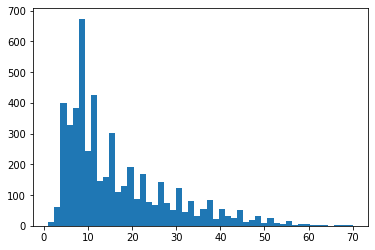

In [33]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [34]:
sum(hist_len) / len(x_train_small)

16.586

In [35]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [36]:
y_train_small = y_train[0:5000]

In [40]:
y_train_small = np.array(y_train_small)-1
np.unique(y_train_small)

array([0, 1, 3, 4])

In [37]:
import numpy as np
np.unique(y_train_small)

array([1, 2, 4, 5])

3이 빠져있는 것을 고려해서 5가지로 생각해야됨

# make model

In [42]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) # input layer
# model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer, Bidrectional 양쪽으로 학습
# model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dense(5, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['acc']) # gadget

In [43]:
hist = model.fit(x_train_small, y_train_small, epochs=2, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/2
14/14 [==============================] - 6s 296ms/step - loss: 1.4769 - acc: 0.4051 - val_loss: 1.2775 - val_acc: 0.5040
Epoch 2/2
14/14 [==============================] - 4s 257ms/step - loss: 1.2686 - acc: 0.4334 - val_loss: 1.2429 - val_acc: 0.5433
